<h1 style="text-align: center; color: green;" markdown="1">Prediction of Demand for Bike Rentals in Seoul</h1>
<h2 style="text-align: center; color: #012180" markdown="1">"Multivariable Linear Regression Analysis"</h2>
<h3 style="text-align: center; color: #012180" markdown="1">Author: Dawit Dean </h2>

![image](bikeimage.jpeg)

### Table of Contents
* [Dataset Information and Source](#anchor1)
* [Attribute Information](#anchor2)
* [Exploratory Data Analysis](#anchor3)
* [Seoul Bike Sharing – Methodology/Empirical Model](#anchor4)

## I. Dataset Information and Source <a id = anchor1 ></a>

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Data Source :http://data.seoul.go.kr/
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

## II. Atrribute Information <a id = anchor2 ></a>

1) Date - year-month-day
2) Rented Bike count - Count of bikes rented at each hour
3) Hour - Hour of he day
4) Temperature-Temperature in Celsius
5) Humidity - %
6) Windspeed - m/s
7) Visibility - 10m
8) Dew point temperature - Celsius
9) Solar radiation - MJ/m2
10) Rainfall - mm
11) Snowfall - cm
12) Seasons - Winter, Spring, Summer, Autumn
13) Holiday - Holiday/No holiday
14) Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## III. Exploratory Data Analysis <a id = anchor3 ></a>

In [1]:
# Import Packages
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
bike = pd.read_csv("/Users/deand/Desktop/ML Projects/Python/Projects/Linear Regression/Seoul Bike Sharing/SeoulBikeData.csv", encoding= 'unicode_escape')
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
# description of specific attributes that will be used by the empirical model
bike[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
      'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']].describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [4]:
# check for missing values in dataset 
bike.isnull().sum().sum()

0

In [5]:
# distributions of seasons
ft_pd = bike['Seasons'].value_counts()

print(f'ft_pd: \n{ft_pd}\n') #evenly split # of observations by seasons

# contingency table: seasons and functioning day
ct_all_rel = pd.crosstab(bike['Seasons'], bike['Functioning Day'], normalize = 'all')
print(f'ct_all_rel: \n{ct_all_rel}\n') #most days are functioning days

ft_pd: 
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

ct_all_rel: 
Functioning Day        No       Yes
Seasons                            
Autumn           0.028196  0.221119
Spring           0.005479  0.246575
Summer           0.000000  0.252055
Winter           0.000000  0.246575



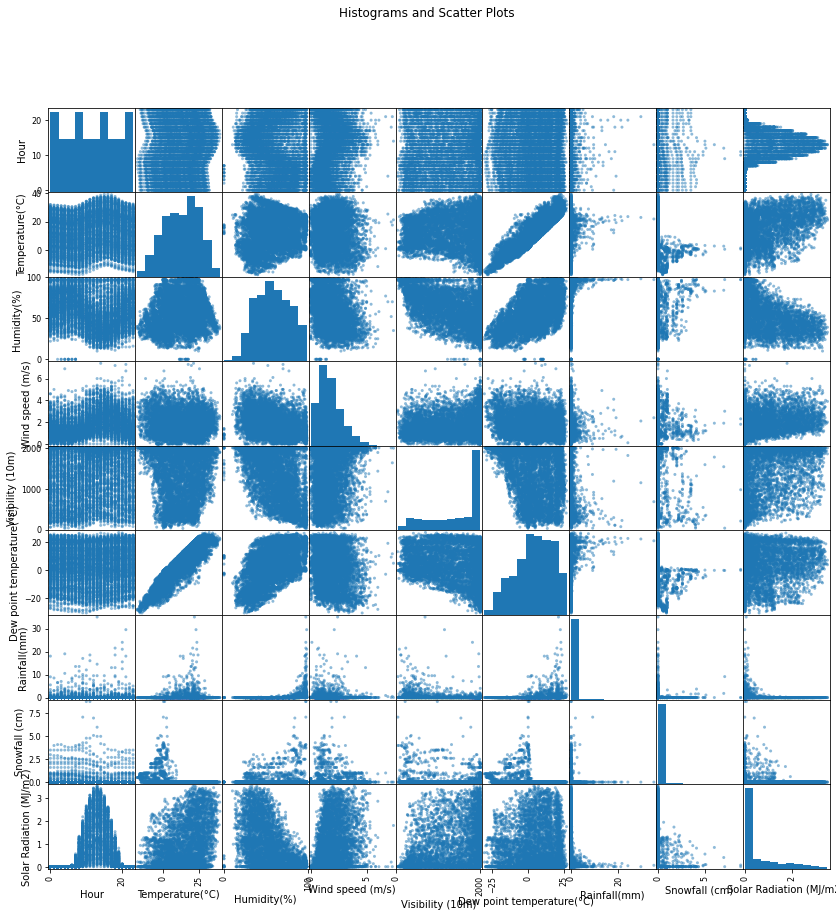

In [6]:
# multicollinearity visualizations 
set1 = bike[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
      'Dew point temperature(°C)', 'Rainfall(mm)', 'Snowfall (cm)', 'Solar Radiation (MJ/m2)']]
pd.plotting.scatter_matrix(set1, alpha=0.5, figsize=(14, 14));
plt.suptitle('Histograms and Scatter Plots');


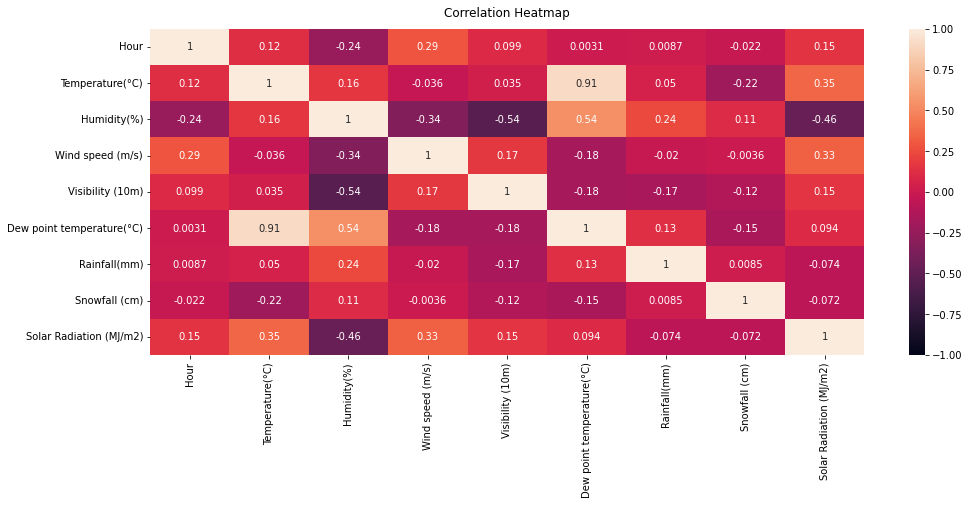

In [7]:
set1 = bike[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
      'Dew point temperature(°C)', 'Rainfall(mm)', 'Snowfall (cm)', 'Solar Radiation (MJ/m2)']]

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(set1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Concerns of multicollinearity between Temperature and Dew point Temperature

### The subplots below shows a potential linear regression fit

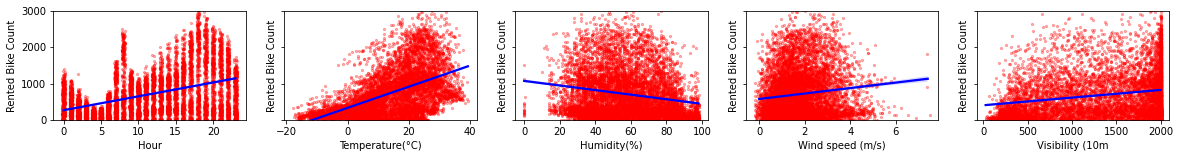

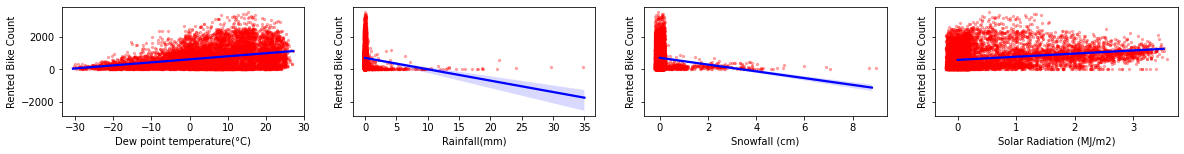

In [8]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, sharey=True, figsize=(20, 2))
fig, (ax6, ax7, ax8, ax9) = plt.subplots(ncols=4, sharey=True, figsize=(20, 2))

sns.regplot(x='Hour', y='Rented Bike Count', ax=ax1, data=bike,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="Hour");

sns.regplot(x='Temperature(°C)', y='Rented Bike Count', ax=ax2, data=bike,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="Temperature(°C)");

sns.regplot(x='Humidity(%)', y='Rented Bike Count', ax=ax3, data=bike,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="Humidity(%)");

sns.regplot(x='Wind speed (m/s)', y='Rented Bike Count', ax=ax4, data=bike,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="Wind speed (m/s)");

sns.regplot(x='Visibility (10m)', y='Rented Bike Count', ax=ax5, data=bike,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="Visibility (10m", ylim=(0,3000));

sns.regplot(x='Dew point temperature(°C)', y='Rented Bike Count', ax=ax6, data=bike,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="Dew point temperature(°C)");

sns.regplot(x='Rainfall(mm)', y='Rented Bike Count', ax=ax7, data=bike,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="Rainfall(mm)");

sns.regplot(x='Snowfall (cm)', y='Rented Bike Count', ax=ax8, data=bike,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="Snowfall (cm)");

sns.regplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count', ax=ax9, data=bike,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="Solar Radiation (MJ/m2)");

In [9]:
#rename variables to avoid tokenization error + simplify 
bike_clean = bike.rename(columns = {'Temperature(°C)':'Temperature', 'Dew point temperature(°C)':'Dew_point_temperature', 
                       'Humidity(%)':'Humidity', 'Rented Bike Count':'Rented_Bike_Count', 'Wind speed (m/s)':'Wind_speed', 
                                    'Visibility (10m)':'Visibility', 'Solar Radiation (MJ/m2)':'Solar_Radiation', 
                                   'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall', 'Functioning Day':'Functioning_Day'})
print(bike_clean.columns)

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')


## IIII. Seoul Bike Sharing – Empirical Model and Regression Analysis <a id = anchor4 ></a>

### Proposed Economic Model

$$ViolentCrimesPerPop = Hour + Temperature(°C) + Humidity + Wind\,speed\,(m/s) + Visibility\,(10m) 
+ Dew\,point\,temperature(°C) + Rainfall(mm) + Snowfall\,(cm) + Solar\,Radiation\,(MJ/m2)$$

### Proposed Econometric Model 

$$Rented Bike Count = \beta_0 + \beta_1 Hour + \beta_2 Temperature(°C) + \beta_3 Humidity +\beta_4 Wind\,speed\,(m/s) + 
\beta_5 Visibility\,(10m) + \beta_6 Dew\,point\,temperature + \beta_7 Rainfall(mm) + \beta_8 Snowfall\,(cm) + \beta_9 Solar\,Radiation\,(MJ/m2) $$

In [10]:
# Running Proposal Model 
m1 = smf.ols('Rented_Bike_Count ~ Hour + Temperature + Humidity + Wind_speed + Visibility + Dew_point_temperature + Solar_Radiation + Rainfall + Snowfall', data = bike_clean).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     864.1
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:34:18   Log-Likelihood:                -66315.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8750   BIC:                         1.327e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               548.8536    100.050      5.486      0.000     352.731     744.976
Hour                     27.3155      0.789     34.642      0.000      25.770      28.861
Temperature              26.5793      3.920      6.780      0.000      18.895      34.264
Humidity                 -8.8115      1.112     -7.925      0.000     -10.991      -6.632
Wind_speed                6.9221      5.469      1.266      0.206      -3.799      17.643
Visibility                0.0213      0.010      2.062      0.039       0.001       0.042
Dew_point_temperature     5.4131      4.132      1.310      0.190      -2.686      13.513
Solar_Radiation         -79.3428      8.210     -9.664      0.000     -95.437     -63.248
Rainfall                -58.8069      4.631    -12.699      0.000     -67.885     -49.729
Snowfall                 21.0770     12.023      1.753      0.080      -2.491      44.645
==============================================================================
Omnibus:                      947.548   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1824.527
Skew:                           0.710   Prob(JB):                         0.00
Kurtosis:                       4.727   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumption 3: Test for Perfect Collinearity/Multicollinearity

In [11]:
# Compute and view VIF
XX = bike_clean[['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 
      'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']].copy()
XX['intercept'] = 1 

# Compute and view VIF
vif = pd.DataFrame()
vif['variables'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['Multicollinearlity is a Problem'] = [vif['VIF'][i] >= 10 for i in range(XX.shape[1])] 

# View results using print
vif   

,variables,VIF,Multicollinearlity is a Problem
0,Hour,1.183686,False
1,Temperature,87.112576,True
2,Humidity,20.362259,True
3,Wind_speed,1.276095,False
4,Visibility,1.567300,False
5,Dew_point_temperature,115.691025,True
6,Solar_Radiation,2.021193,False
7,Rainfall,1.084427,False
8,Snowfall,1.095396,False
9,intercept,397.715363,True


note: we suspect multicollinearlity between Temperature, Dew_point_temperature, and Humidity

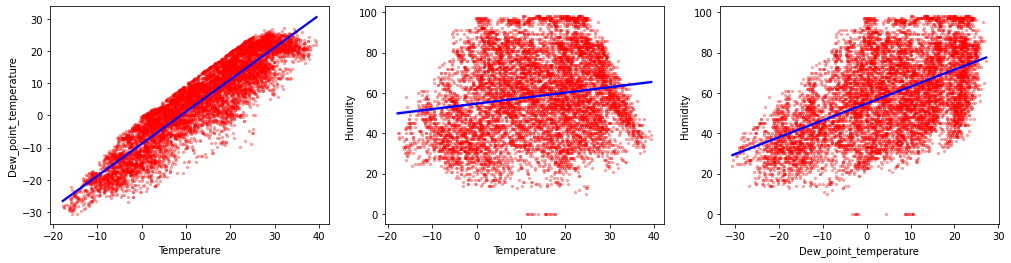

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(17, 4))

sns.regplot(x = 'Temperature', y = 'Dew_point_temperature', ax = ax1, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Temperature");

sns.regplot(x = 'Temperature', y = 'Humidity', ax = ax2, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Temperature");

sns.regplot(x = 'Dew_point_temperature', y = 'Humidity', ax = ax3, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Dew_point_temperature");

#### Test for Multicollinearlity After Removing Dew Point Temperature

In [13]:
# Compute and view VIF 
XXX = bike_clean[['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 
      'Solar_Radiation', 'Rainfall', 'Snowfall']].copy()
XXX['intercept'] = 1 

# Compute and view VIF
vif1 = pd.DataFrame()
vif1['variables'] = XXX.columns
vif1['VIF'] = [variance_inflation_factor(XXX.values, i) for i in range(XXX.shape[1])]
vif1['Multicollinearlity is a Problem'] = [vif1['VIF'][i] >= 10 for i in range(XXX.shape[1])] 

# View results using print
vif1  

,variables,VIF,Multicollinearlity is a Problem
0,Hour,1.181468,False
1,Temperature,1.623991,False
2,Humidity,2.534083,False
3,Wind_speed,1.274067,False
4,Visibility,1.556883,False
5,Solar_Radiation,1.924897,False
6,Rainfall,1.070513,False
7,Snowfall,1.090421,False
8,intercept,53.654460,True


note: all the varaince inflation factor values are below 10 thus multicollinearlity shouldn't be a problem

### Assumption 4: Zero Conditional Mean

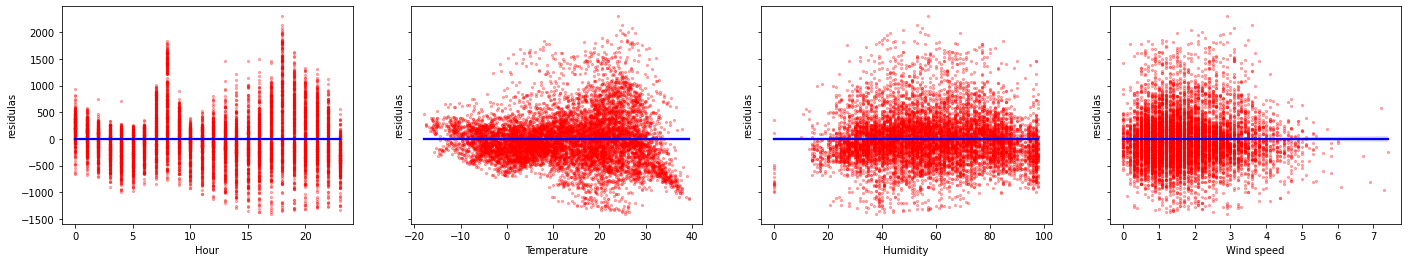

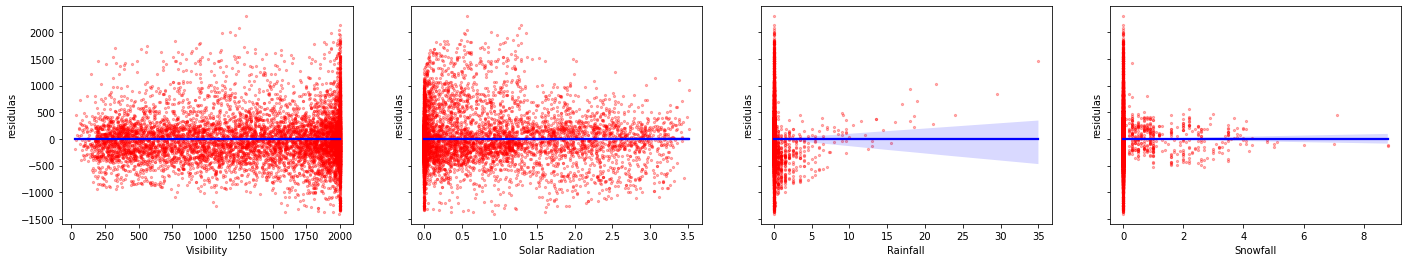

In [14]:
m2 = smf.ols('Rented_Bike_Count ~ Hour + Temperature + Humidity + Wind_speed + Visibility + Solar_Radiation + Rainfall + Snowfall', data = bike_clean).fit()

resid = m2.resid
fv = m2.fittedvalues

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True, figsize=(24, 4))
fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, sharey=True, figsize=(24, 4))

sns.regplot(x = 'Hour', y = resid, ax = ax1, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Hour", ylabel='residulas');

sns.regplot(x = 'Temperature',y = resid, ax = ax2, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Temperature", ylabel='residulas');
                                    
sns.regplot(x = 'Humidity', y = resid, ax = ax3, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Humidity", ylabel='residulas');

sns.regplot(x = 'Wind_speed', y = resid, ax = ax4, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Wind speed", ylabel='residulas');

sns.regplot(x = 'Visibility', y = resid, ax = ax5, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Visibility", ylabel='residulas');

sns.regplot(x = 'Solar_Radiation', y = resid, ax = ax6, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Solar Radiation", ylabel='residulas');  
                                                  
sns.regplot(x = 'Rainfall', y = resid, ax = ax7, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Rainfall", ylabel='residulas');       

sns.regplot(x = 'Snowfall', y = resid, ax = ax8, data = bike_clean, line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}).set(
                                                  xlabel="Snowfall", ylabel='residulas');                                                                                                                                              

Residuals appear randomly and symmetrically distributed around zero. Thus the zero conditional mean assumptions is satisfied. 

### Assumption 5: Homoskedasticity

In [15]:
from statsmodels.compat import lzip

# BP test
test = sms.het_breuschpagan(m2.resid, m2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('B-P Test')
display(pd.DataFrame(lzip(labels,test)))


B-P Test


,0,1
0,LM Statistic,8.792503e+02
1,LM-Test p-value,1.687629e-184
2,F-Statistic,1.220430e+02
3,F-Test p-value,1.437281e-194


Our LM and F p-value are both extremely small, so we reject the null hypothesis of homoskedasticity. Running the Bresuch-Pagan Test does indicate the presence of heteroskedasticity in our model. 

**Below is the transformed regression**

In [16]:
# FGLS: Estimation of the variance function
bike_clean['logu2'] = np.log(m2.resid**2)
var_lm = smf.ols('logu2 ~ Hour + Temperature + Humidity + Wind_speed + Visibility + Solar_Radiation + Rainfall + Snowfall', data=bike_clean).fit()

# FGLS: WLS
bike_clean['w'] = 1 / np.exp(var_lm.predict())

import statsmodels.api as stmod
bike_fgls = stmod.WLS(bike_clean['Rented_Bike_Count'], stmod.add_constant(bike_clean[['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']]), weights = bike_clean['w']).fit()


stargazer2 = Stargazer([bike_fgls])
stargazer2